In [417]:
# How does the size of a Starbucks drink (e.g., Tall, Grande, Venti) impact the overall calorie count?
# How does the sugar content of a Grande latte compare to the American Heart Association's recommended daily limit for added sugar? 
# Are there any Starbucks drinks that are naturally sweetened and have a low sugar content? 
# What are the most caffeinated Starbucks drinks, and how much caffeine do they contain?

In [418]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [419]:
drinks = pd.read_csv('drinks-nutrition.csv')
drinks_expanded = pd.read_csv('drinks-expanded.csv')
food = pd.read_csv('food-nutrition-category.csv')

In [420]:
drinks.head()

,Unnamed: 0,Calories,Fat (g),Carb. (g),Fiber (g),Protein,Sodium
0,Cool Lime Starbucks Refreshers™ Beverage,45,0,11,0,0,10
1,Ombré Pink Drink,-,-,-,-,-,-
2,Pink Drink,-,-,-,-,-,-
3,Strawberry Acai Starbucks Refreshers™ Beverage,80,0,18,1,0,10
4,Very Berry Hibiscus Starbucks Refreshers™ Beve...,60,0,14,1,0,10


In [421]:
# Delete the rows filled with empty values '-'
drinks = drinks[drinks['Calories'] != '-']

In [422]:
drinks.info()

<class 'pandas.core.frame.DataFrame'>
Index: 92 entries, 0 to 173
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  92 non-null     object
 1   Calories    92 non-null     object
 2   Fat (g)     92 non-null     object
 3   Carb. (g)   92 non-null     object
 4   Fiber (g)   92 non-null     object
 5   Protein     92 non-null     object
 6   Sodium      92 non-null     object
dtypes: object(7)
memory usage: 5.8+ KB


In [423]:
# Make all the values into floats
drink_columns = list(drinks.columns)
drink_columns.pop(0)
for col in drink_columns:
    drinks[col] = drinks[col].astype(float)

In [424]:
drinks.describe()
# Calories range from 0-430 (mean: 135)
# Fat ranges from 0-26 (mean: 2.3)
# Carb ranges from 0-64 (mean: 24.7)
# Fiber ranges from 0-8 (mean: 0.4)
# Protein ranges from 0-20 (mean: 4.2)
# Sodium ranges from 0-240 (mean: 58)

,Calories,Fat (g),Carb. (g),Fiber (g),Protein,Sodium
count,92.000000,92.000000,92.000000,92.000000,92.000000,92.000000
mean,135.163043,2.336957,24.739130,0.445652,4.152174,57.934783
std,93.853554,3.887928,15.214849,1.417040,5.691588,68.384627
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,60.000000,0.000000,14.750000,0.000000,0.000000,10.000000
50%,130.000000,0.000000,25.500000,0.000000,1.000000,15.000000
75%,190.000000,4.125000,35.000000,0.000000,8.250000,115.000000
max,430.000000,26.000000,64.000000,8.000000,20.000000,240.000000


In [425]:
# Which has the highest calories?
drinks[drinks['Calories'] >= drinks['Calories'].quantile(.8)].sort_values(by='Calories', ascending=False)

# Which has the highest sugar (carb) content?
drinks[drinks['Carb. (g)'] >= drinks['Carb. (g)'].quantile(.8)].sort_values(by='Carb. (g)', ascending=False)

# Which has the highest fat content?
drinks[drinks['Fat (g)'] >= drinks['Fat (g)'].quantile(.8)].sort_values(by='Fat (g)', ascending=False)

# Which has the least amount of sugar (carb) content?
drinks[drinks['Carb. (g)'] <= drinks['Carb. (g)'].quantile(.2)].sort_values(by='Carb. (g)', ascending=True)

# Which drinks have protein?!
drinks[drinks['Protein'] >= drinks['Fat (g)'].quantile(.8)].sort_values(by='Fat (g)', ascending=False)

,Unnamed: 0,Calories,Fat (g),Carb. (g),Fiber (g),Protein,Sodium
110,Starbucks® Signature Hot Chocolate,430.0,26.0,45.0,5.0,12.0,115.0
139,White Chocolate Mocha,360.0,11.0,53.0,0.0,14.0,240.0
129,Iced Coconutmilk Mocha Macchiato,260.0,9.0,34.0,0.0,11.0,180.0
109,Hot Chocolate,320.0,9.0,47.0,4.0,14.0,160.0
118,Coconutmilk Mocha Macchiato,250.0,9.0,32.0,0.0,12.0,180.0
113,Caffè Mocha,290.0,8.0,42.0,4.0,13.0,140.0
133,Iced White Chocolate Mocha,300.0,8.0,47.0,0.0,10.0,190.0
126,Iced Caramel Macchiato,250.0,7.0,37.0,0.0,10.0,150.0
112,Caffè Latte,190.0,7.0,19.0,0.0,13.0,170.0
115,Caramel Macchiato,250.0,7.0,35.0,0.0,10.0,150.0


## Examining drinks_expanded

In [427]:
drinks_expanded.head()

,Beverage_category,Beverage,Size,Beverage_prep,Calories,Total Fat (g),Saturated Fat (g),Trans Fat (g),Cholesterol (mg),Sodium (mg),Total Carbohydrates (g),Dietary Fibre (g),Sugars (g),Protein (g),Vitamin A (% DV),Vitamin C (% DV),Calcium (% DV),Iron (% DV),Caffeine (mg)
0,Coffee,Brewed Coffee,Short,NaN,3,0.1,0.0,0.0,0,5,0,0,0,0.3,0%,0%,0%,0%,175
1,Coffee,Brewed Coffee,Tall,NaN,4,0.1,0.0,0.0,0,10,0,0,0,0.5,0%,0%,0%,0%,260
2,Coffee,Brewed Coffee,Grande,NaN,5,0.1,0.0,0.0,0,10,0,0,0,1.0,0%,0%,0%,0%,330
3,Coffee,Brewed Coffee,Venti,NaN,5,0.1,0.0,0.0,0,10,0,0,0,1.0,0%,0%,2%,0%,410
4,Classic Espresso Drinks,Caffè Latte,Short,Nonfat Milk,70,0.1,0.1,0.0,5,75,10,0,9,6.0,10%,0%,20%,0%,75


In [428]:
drinks_expanded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 242 entries, 0 to 241
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Beverage_category        242 non-null    object 
 1   Beverage                 242 non-null    object 
 2   Size                     242 non-null    object 
 3   Beverage_prep            218 non-null    object 
 4   Calories                 242 non-null    int64  
 5   Total Fat (g)            242 non-null    float64
 6   Saturated Fat (g)        242 non-null    float64
 7   Trans Fat (g)            242 non-null    float64
 8   Cholesterol (mg)         242 non-null    int64  
 9   Sodium (mg)              242 non-null    int64  
 10  Total Carbohydrates (g)  242 non-null    int64  
 11  Dietary Fibre (g)        242 non-null    int64  
 12  Sugars (g)               242 non-null    int64  
 13  Protein (g)              242 non-null    float64
 14  Vitamin A (% DV)         2

In [429]:
# Turning the minerals and caffeine into int

# drinks_expanded['Caffeine (mg)'] = drinks_expanded['Caffeine (mg)'].astype(int)
# Cannot because some values are not integers...time to investigate

# drinks_expanded['Caffeine (mg)'].value_counts()

# there are some 'varies' and 'Varies'
unknown_caffeine = drinks_expanded[(drinks_expanded['Caffeine (mg)'] == 'varies') | (drinks_expanded['Caffeine (mg)'] == 'Varies')]

# Convert these values to 0
drinks_expanded.loc[(drinks_expanded['Caffeine (mg)'] == 'varies') | (drinks_expanded['Caffeine (mg)'] == 'Varies'), 'Caffeine (mg)'] = 0

# now change these values to int
drinks_expanded['Caffeine (mg)'] = drinks_expanded['Caffeine (mg)'].astype(int)

In [430]:
# Turning the other minerals (Vitamin A, C, Calcium, Iron) into integers

# drinks_expanded['Vitamin A (% DV)'].value_counts()

# Inspection shows that we just need to get rid of the % sign
# And some values have a '.' in them it won't convert to an integer
# Then change them to int
minerals = ['Vitamin A (% DV)', 'Vitamin C (% DV)', 'Calcium (% DV)', 'Iron (% DV)']
for col in minerals:
    drinks_expanded[col] = drinks_expanded[col].str.replace('%', '', regex=False)
    drinks_expanded[col] = drinks_expanded[col].str.replace('.00', '', regex=False)
    drinks_expanded[col] = drinks_expanded[col].astype('Int64')

# drinks_expanded.info()

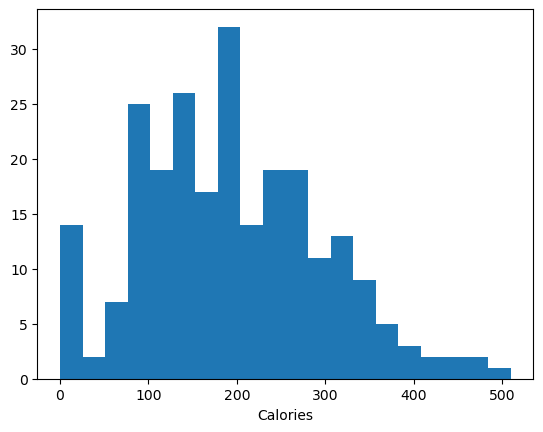

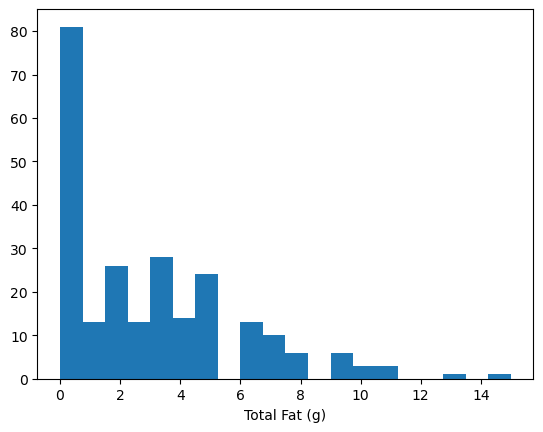

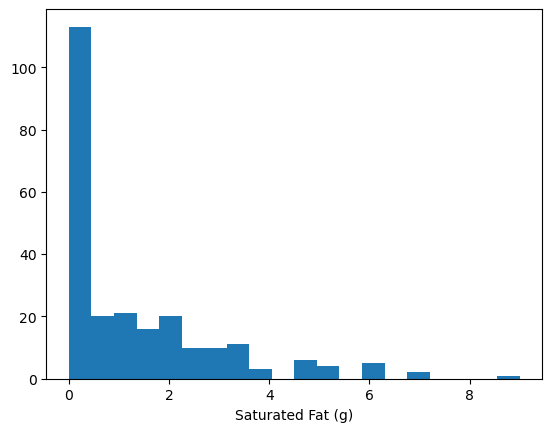

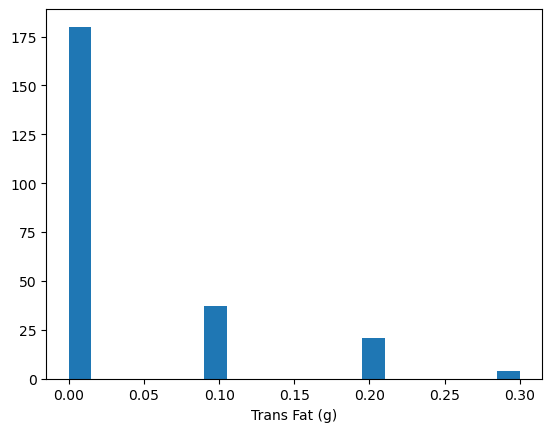

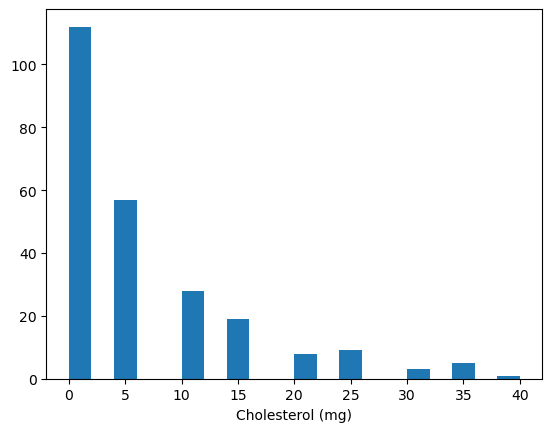

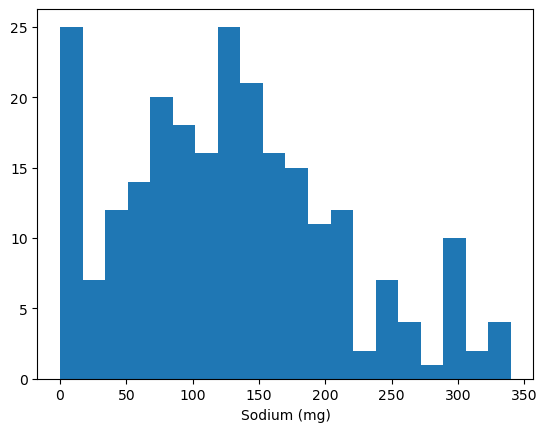

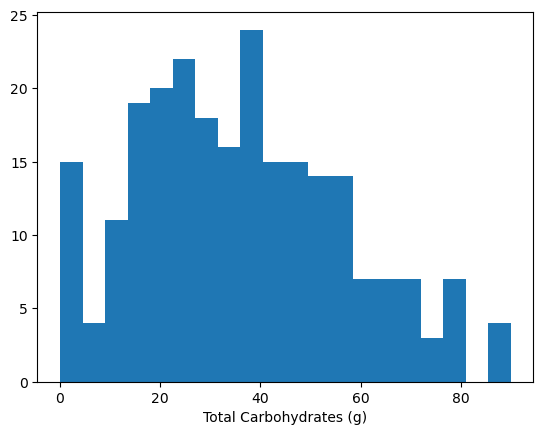

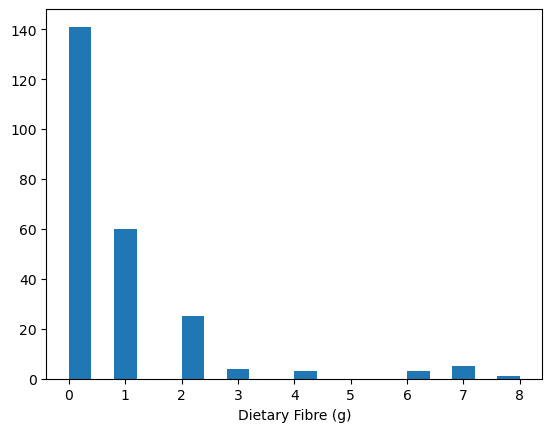

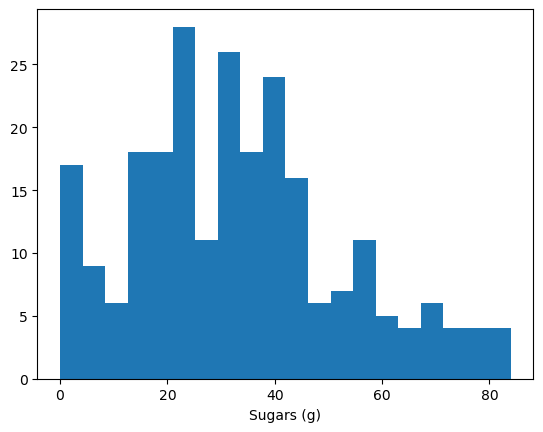

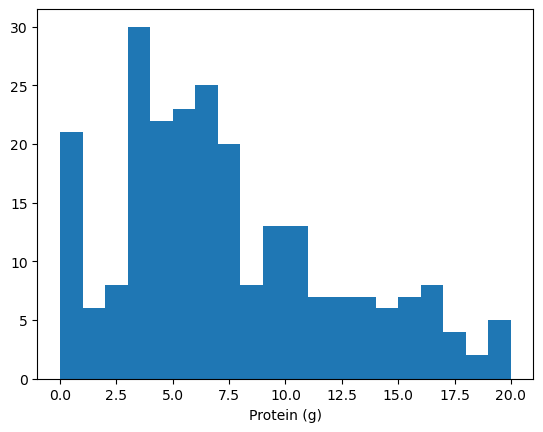

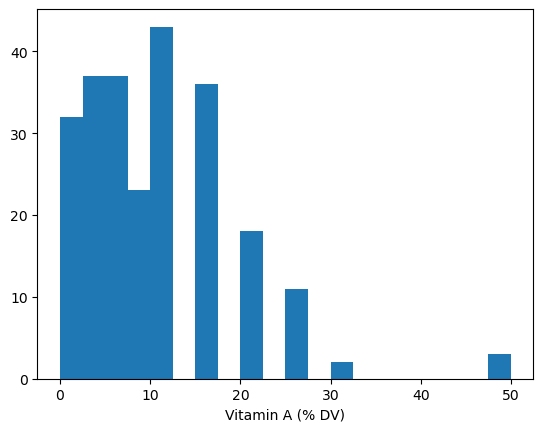

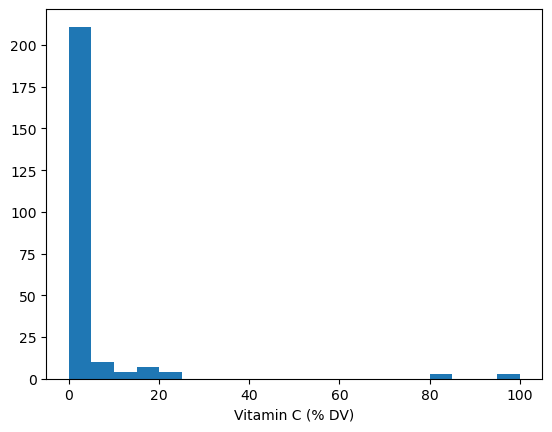

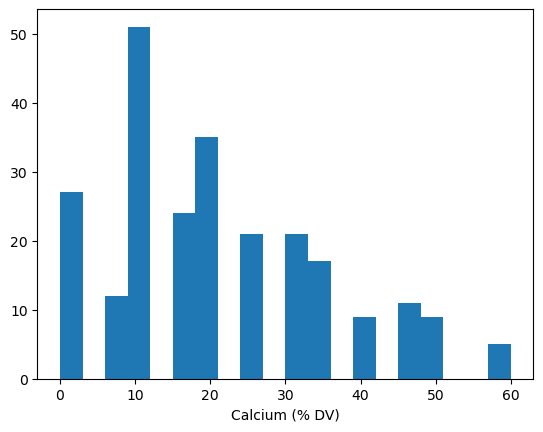

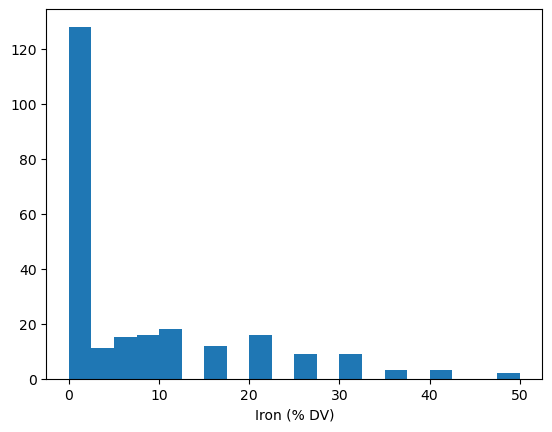

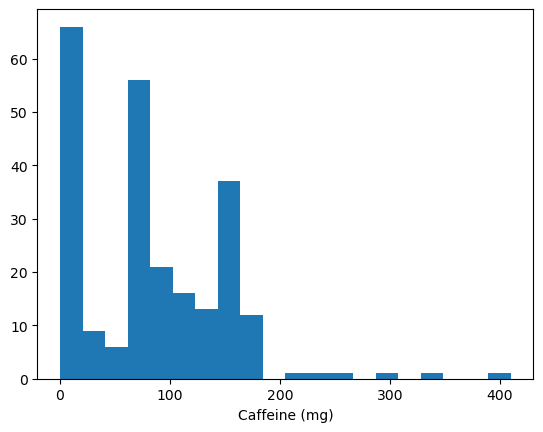

In [431]:
drink_columns = drinks_expanded.select_dtypes(exclude='object').columns
drink_columns
for col in drink_columns:
    plt.hist(drinks_expanded[col], bins=20)
    plt.xlabel(col)
    plt.show()

In [432]:
drink_columns

Index(['Calories', 'Total Fat (g)', 'Saturated Fat (g)', 'Trans Fat (g)',
       'Cholesterol (mg)', 'Sodium (mg)', 'Total Carbohydrates (g)',
       'Dietary Fibre (g)', 'Sugars (g)', 'Protein (g)', 'Vitamin A (% DV)',
       'Vitamin C (% DV)', 'Calcium (% DV)', 'Iron (% DV)', 'Caffeine (mg)'],
      dtype='object')

In [433]:
# Some questions:
# Which drinks have the most calories? White Chocolate Mocha, Java Chip Frappuccino, Tazo Green Tea Latte
col, thresh = 'Calories', 0.95

drinks_expanded[drinks_expanded[col] >= drinks_expanded[col].quantile(thresh)].sort_values(by=col, ascending=False)

,Beverage_category,Beverage,Size,Beverage_prep,Calories,Total Fat (g),Saturated Fat (g),Trans Fat (g),Cholesterol (mg),Sodium (mg),Total Carbohydrates (g),Dietary Fibre (g),Sugars (g),Protein (g),Vitamin A (% DV),Vitamin C (% DV),Calcium (% DV),Iron (% DV),Caffeine (mg)
84,Signature Espresso Drinks,White Chocolate Mocha (Without Whipped Cream),Venti,2% Milk,510,15.0,9.0,0.2,35,330,77,0,74,19.0,20,4,60,2,150
85,Signature Espresso Drinks,White Chocolate Mocha (Without Whipped Cream),Venti,Soymilk,460,13.0,6.0,0.0,5,290,70,1,64,16.0,15,2,60,20,150
215,Frappuccino® Blended Coffee,Frappuccino Blended Coffee - Java Chip (w/o Wh...,Venti,Whole Milk,460,10.0,7.0,0.2,15,340,90,2,84,7.0,6,0,15,35,145
83,Signature Espresso Drinks,White Chocolate Mocha (Without Whipped Cream),Venti,Nonfat Milk,450,7.0,6.0,0.0,10,310,78,0,74,19.0,25,2,60,2,150
128,Tazo® Tea Drinks,Tazo® Green Tea Latte,Venti,2% Milk,450,10.0,5.0,0.3,40,230,72,2,71,17.0,25,20,50,6,110
216,Frappuccino® Blended Coffee,Frappuccino Blended Coffee - Java Chip (w/o Wh...,Venti,Soymilk,430,8.0,4.5,0.0,0,330,88,3,80,6.0,6,0,20,40,145
214,Frappuccino® Blended Coffee,Frappuccino Blended Coffee - Java Chip (w/o Wh...,Venti,Nonfat Milk,420,5.0,4.0,0.0,5,340,90,2,84,7.0,10,0,20,35,145
81,Signature Espresso Drinks,White Chocolate Mocha (Without Whipped Cream),Grande,2% Milk,400,11.0,7.0,0.2,25,250,61,0,58,15.0,15,2,45,0,150
129,Tazo® Tea Drinks,Tazo® Green Tea Latte,Venti,Soymilk,390,8.0,1.0,0.0,0,180,64,4,58,14.0,20,20,60,30,110
197,Frappuccino® Blended Coffee,Frappuccino Blended Coffee - Mocha (w/o Whippe...,Venti,Whole Milk,390,6.0,3.5,0.1,15,300,80,1,76,6.0,8,0,15,10,140


([0, 1, 2, 3, 4, 5],
 [Text(0, 0, 'Caffè Mocha (Without Whipped Cream)'),
  Text(1, 0, 'Hot Chocolate (Without Whipped Cream)'),
  Text(2, 0, 'Frappuccino Blended Coffee - Java Chip (w/o Whipped Cream)'),
  Text(3, 0, 'Frappuccino Light Blended Coffee - Java Chip'),
  Text(4, 0, 'Orange Mango Banana Smoothie'),
  Text(5, 0, 'Tazo® Green Tea Latte')])

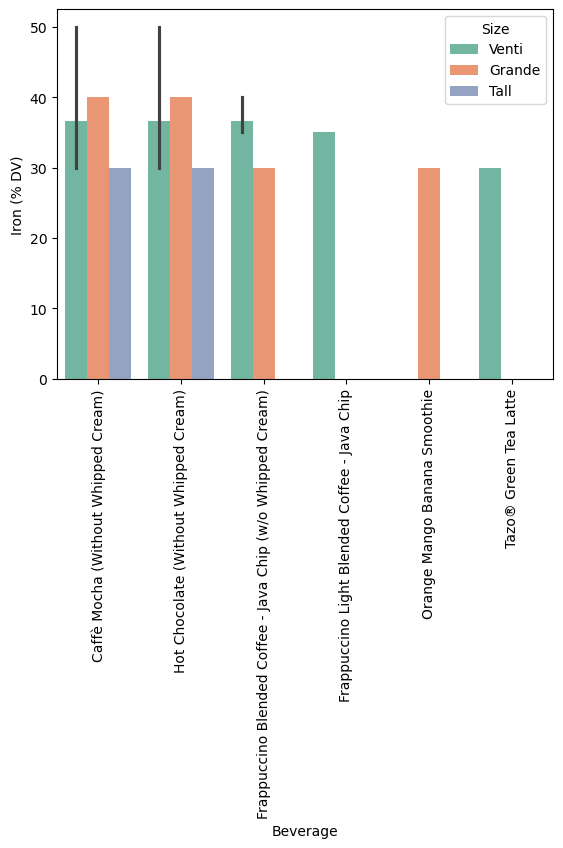

In [525]:
# Some questions:
# Which drinks has a lot of total fat (9g +)? Mainly mochas and hot chocolate
# col, thresh = 'Total Fat (g)', 0.95

# Which drinks has a lot of saturated fat (4g +)? Mainly mochas and Java Chip Frappuccino 
# col, thresh = 'Saturated Fat (g)', 0.95

# Which drinks has a lot of dietary fiber (60g +)? Strawberry banana or banana chocolate smoothies
# col, thresh = 'Dietary Fibre (g)', 0.95

# Which drinks has a lot of Vitamin A (30% +)? Orange mango banana smoothie
# col, thresh = 'Vitamin A (% DV)', 0.95

# Which drinks has a lot of Vitamin C (80% +)? Strawberry banana smoothie
# col, thresh = 'Vitamin C (% DV)', 0.95

# Which drinks has a lot of calcium (40% +)? Taxo Green Tea Latte, White Chocolate Mocha, Hot Chocolate, Cafe Latte, 
# col, thresh = 'Calcium (% DV)', 0.95

# Which drinks has a lot of iron (20% +)? Hot chocolate, Java Chip Frappuccino, Caffe Mocha
col, thresh = 'Iron (% DV)', 0.95

# Which drinks has a lot of caffeine (200mg +)? Brewed Coffee, Caffe Americano, 
# col, thresh = 'Caffeine (mg)', 0.95

# Print out the dataframe
df = drinks_expanded[drinks_expanded[col] >= drinks_expanded[col].quantile(thresh)].sort_values(by=col, ascending=False)
df

# Only give the names of the beverages
# df['Beverage'].unique()

# Make a bar chart
sns.barplot(data=df, x='Beverage', y=col, hue='Size', palette='Set2')
plt.xticks(rotation=90)

### What are the most caffeinated drinks?

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
 [Text(0, 0, 'Brewed Coffee'),
  Text(1, 0, 'Caffè Americano'),
  Text(2, 0, 'Iced Brewed Coffee (With Classic Syrup)'),
  Text(3, 0, 'Caffè Mocha (Without Whipped Cream)'),
  Text(4, 0, 'Iced Brewed Coffee (With Milk & Classic Syrup)'),
  Text(5, 0, 'Frappuccino Light Blended Coffee - Java Chip'),
  Text(6, 0, 'Vanilla Latte (Or Other Flavoured Latte)'),
  Text(7, 0, 'White Chocolate Mocha (Without Whipped Cream)'),
  Text(8, 0, 'Caramel Macchiato'),
  Text(9, 0, 'Caffè Latte'),
  Text(10, 0, 'Skinny Latte (Any Flavour)'),
  Text(11, 0, 'Espresso'),
  Text(12, 0, 'Cappuccino')])

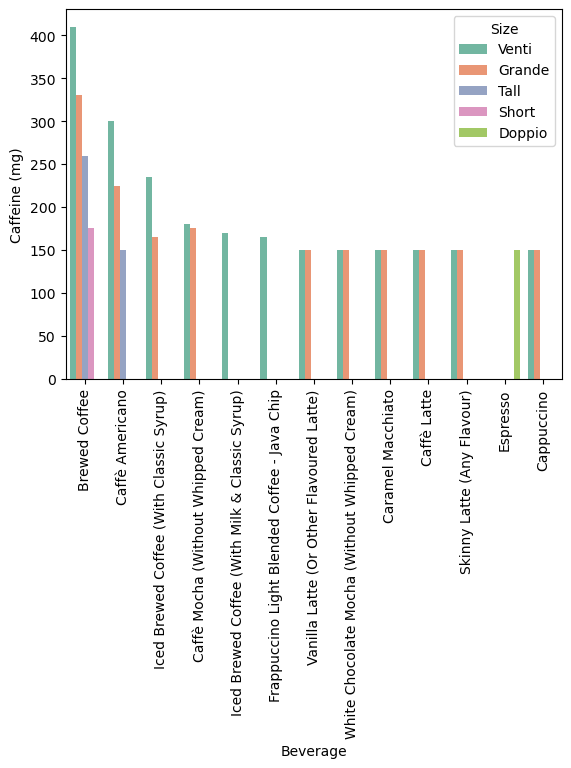

In [436]:
# Which drinks has a lot of caffeine (200mg +)? Brewed Coffee, Caffe Americano, 
col, thresh = 'Caffeine (mg)', 0.80

high_caffeine = drinks_expanded[drinks_expanded[col] >= drinks_expanded[col].quantile(thresh)].sort_values(by=col, ascending=False)
sns.barplot(data=high_caffeine, x='Beverage', y=col, hue='Size', palette='Set2')
plt.xticks(rotation=90)

# You can see that brewed coffee has a lot of caffeine! Even a short cup will be equivalent to many other highly caffeinated drinks.
# The Caffe Americano makes a close second, which make sense since it is diluted espresso
# The iced brewed coffee is just chilled (and slightly diluted) coffee

# The rest contain the same amount of caffeine as a double shot, which is presumably what these drinks are made of

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
 [Text(0, 0, 'Caffè Latte'),
  Text(1, 0, 'White Chocolate Mocha (Without Whipped Cream)'),
  Text(2, 0, 'Skinny Latte (Any Flavour)'),
  Text(3, 0, 'Caramel Macchiato'),
  Text(4, 0, 'Espresso'),
  Text(5, 0, 'Frappuccino Blended Coffee - Java Chip (w/o Whipped Cream)'),
  Text(6, 0, 'Cappuccino'),
  Text(7, 0, 'Vanilla Latte (Or Other Flavoured Latte)'),
  Text(8, 0, 'Caffè Americano'),
  Text(9, 0, 'Frappuccino Blended Coffee - Mocha (w/o Whipped Cream)'),
  Text(10, 0, 'Frappuccino Blended Coffee - Coffee'),
  Text(11, 0, 'Frappuccino Light Blended Coffee - Coffee'),
  Text(12, 0, 'Frappuccino Blended Coffee - Caramel (w/o Whipped Cream)'),
  Text(13, 0, 'Frappuccino Light Blended Coffee - Mocha'),
  Text(14, 0, 'Tazo® Chai Tea Latte'),
  Text(15, 0, 'Frappuccino Light Blended Coffee - Java Chip'),
  Text(16, 0, 'Frappuccino Light Blended Coffee - Caramel'),
  Text(17, 0, 'Tazo® Green Tea Latte'),
  Text(18, 0

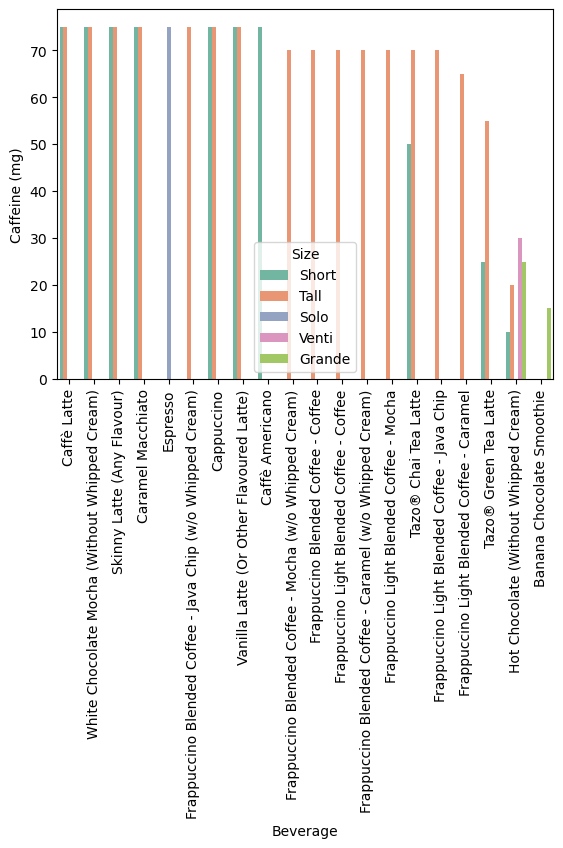

In [481]:
# Which drinks has a little bit of caffeine?
col, thresh = 'Caffeine (mg)', 75

low_caffeine = drinks_expanded[(drinks_expanded[col] <= thresh) & (drinks_expanded[col] > 0)].sort_values(by=col, ascending=False)
sns.barplot(data=low_caffeine, x='Beverage', y=col, hue='Size', palette='Set2')
plt.xticks(rotation=90)

# You can see that brewed coffee has a lot of caffeine! Even a short cup will be equivalent to many other highly caffeinated drinks.
# The Caffe Americano makes a close second, which make sense since it is diluted espresso
# The iced brewed coffee is just chilled (and slightly diluted) coffee

# The rest contain the same amount of caffeine as a double shot, which is presumably what these drinks are made of

### How does the size of a Starbucks drink (e.g., Tall, Grande, Venti) impact the overall calorie count?
* Short = 12 oz
* Tall = 16 oz
* Grande = 20 oz
* Venti = 24 oz

A grande is 125% the size of a tall

([0, 1, 2, 3, 4, 5],
 [Text(0, 0, 'White Chocolate Mocha (Without Whipped Cream)'),
  Text(1, 0, 'Hot Chocolate (Without Whipped Cream)'),
  Text(2, 0, 'Tazo® Green Tea Latte'),
  Text(3, 0, 'Frappuccino Blended Coffee - Mocha (w/o Whipped Cream)'),
  Text(4, 0, 'Frappuccino Blended Coffee - Caramel (w/o Whipped Cream)'),
  Text(5, 0, 'Frappuccino Blended Coffee - Java Chip (w/o Whipped Cream)')])

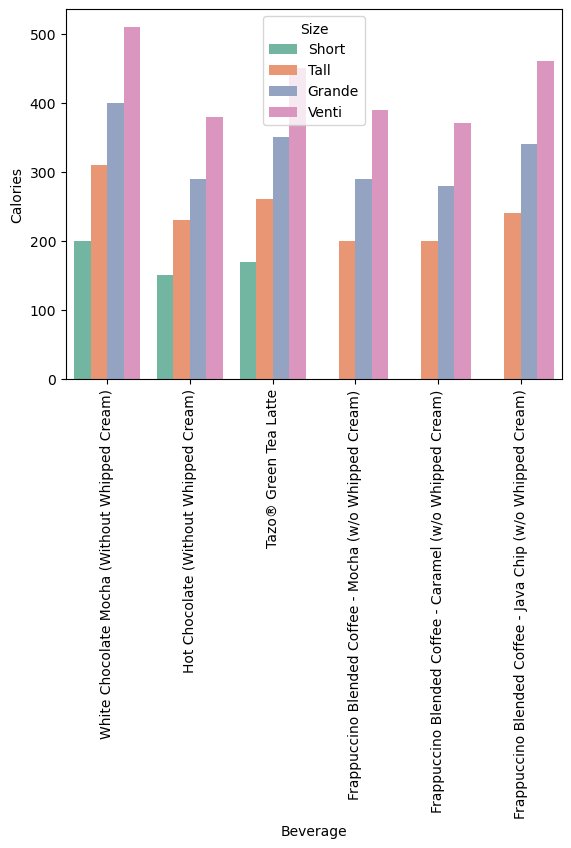

In [483]:
# Let's look at the drinks with the largest caloric content
col, thresh = 'Calories', 0.95
high_calorie = drinks_expanded[drinks_expanded[col] >= drinks_expanded[col].quantile(thresh)].sort_values(by=col, ascending=False)
bevs = list(high_calorie['Beverage'].unique())
bevs
# ['White Chocolate Mocha (Without Whipped Cream)', 'Java Chip (Without Whipped Cream)', 'Tazo® Green Tea Latte', 'Mocha (Without Whipped Cream)', 'Hot Chocolate (Without Whipped Cream)', 'Caramel (Without Whipped Cream)']

# Clean df with only 2% milk or Whole milk values
milk = ["2% Milk", "Whole Milk"]
high_cal_beverages = drinks_expanded[(drinks_expanded['Beverage'].isin(bevs)) & (drinks_expanded['Beverage_prep'].isin(milk))]

# Make a bar chart of the calories
# When we make a comparison plot, should we be grouping the size or the beverage?
sns.barplot(data=high_cal_beverages, x='Beverage', y='Calories', hue='Size', palette='Set2')
plt.xticks(rotation=90)

([0, 1, 2, 3, 4, 5],
 [Text(0, 0, 'Tazo® Tea'),
  Text(1, 0, 'Brewed Coffee'),
  Text(2, 0, 'Espresso'),
  Text(3, 0, 'Caffè Americano'),
  Text(4, 0, 'Shaken Iced Tazo® Tea (With Classic Syrup)'),
  Text(5, 0, 'Cappuccino')])

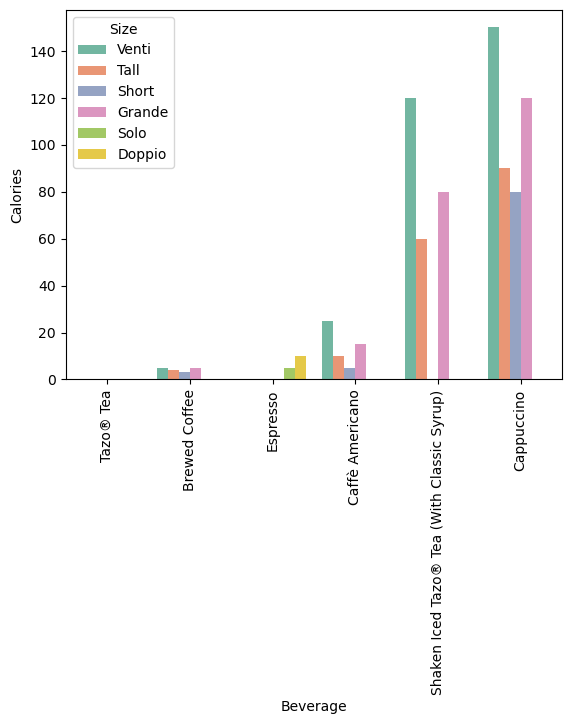

In [515]:
# Does this look different with lower calories?
col, thresh = 'Calories', 0.08
low_calorie = drinks_expanded[drinks_expanded[col] <= drinks_expanded[col].quantile(thresh)].sort_values(by=col, ascending=True)
bevs = list(low_calorie['Beverage'].unique())
bevs
# ['Tazo® Tea', 'Brewed Coffee', 'Caffè Americano', 'Espresso', 'Cappuccino', 'Shaken Iced Tazo® Tea (With Classic Syrup)', 'Iced Brewed Coffee (With Classic Syrup)', 'Skinny Latte (Any Flavour)', 'Caffè Latte', 'Iced Brewed Coffee (With Milk & Classic Syrup)', 'Tazo® Full-Leaf Red Tea Latte (Vanilla Rooibos)', 'Tazo® Full-Leaf Tea Latte']

# Clean df with only 2% milk or Whole milk values
milk = ["2% Milk", "Whole Milk", "", np.nan]
low_cal_beverages = drinks_expanded[(drinks_expanded['Beverage'].isin(bevs)) & (drinks_expanded['Beverage_prep'].isin(milk))].sort_values(by=col, ascending=True)

# Make a bar chart of the calories
# When we make a comparison plot, should we be grouping the size or the beverage?
sns.barplot(data=low_cal_beverages, x='Beverage', y='Calories', hue='Size', palette='Set2')
plt.xticks(rotation=90)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 [Text(0, 0, 'Tazo® Tea'),
  Text(1, 0, 'Brewed Coffee'),
  Text(2, 0, 'Espresso'),
  Text(3, 0, 'Caffè Americano'),
  Text(4, 0, 'Shaken Iced Tazo® Tea (With Classic Syrup)'),
  Text(5, 0, 'Cappuccino'),
  Text(6, 0, 'White Chocolate Mocha (Without Whipped Cream)'),
  Text(7, 0, 'Hot Chocolate (Without Whipped Cream)'),
  Text(8, 0, 'Tazo® Green Tea Latte'),
  Text(9, 0, 'Frappuccino Blended Coffee - Mocha (w/o Whipped Cream)'),
  Text(10, 0, 'Frappuccino Blended Coffee - Caramel (w/o Whipped Cream)'),
  Text(11, 0, 'Frappuccino Blended Coffee - Java Chip (w/o Whipped Cream)')])

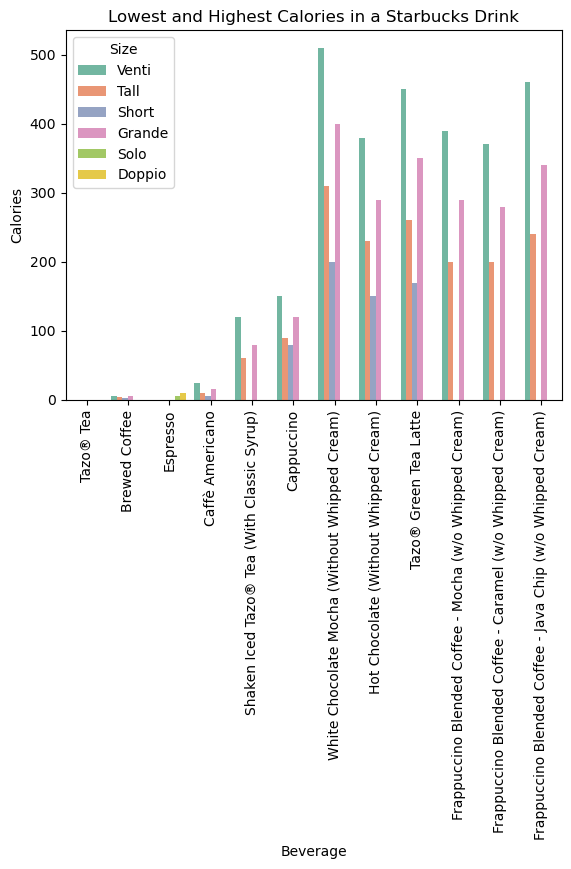

In [517]:
# can you combine high and low caloric graphs into one?
calorie_beverages = pd.concat([low_cal_beverages, high_cal_beverages], axis=0)
sns.barplot(data=calorie_beverages, x='Beverage', y='Calories', hue='Size', palette='Set2')
plt.title("Lowest and Highest Calories in a Starbucks Drink")
plt.xticks(rotation=90)

### How does the sugar content of a Grande latte compare to the American Heart Association's recommended daily limit for added sugar? 

The AHA recommends 25 grams and 36 grams of added sugar intake for women and men, respectively.

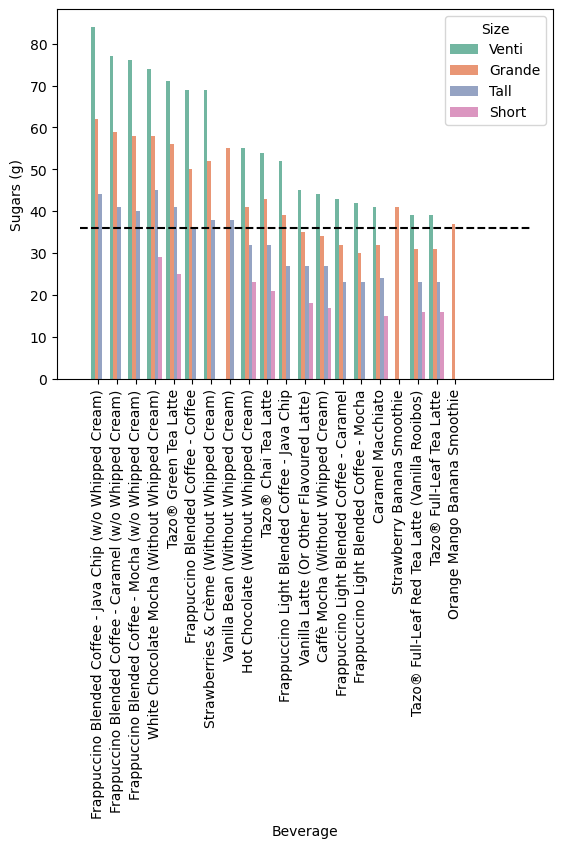

In [441]:
# Assume 'Nonfat Milk' or '' for 'Beverage_prep' for simplicity
# Men first
col, thresh = 'Sugars (g)', 36
high_sugar = drinks_expanded[(drinks_expanded[col] > thresh)]
bevs = list(high_sugar['Beverage'].unique())

milk = ["Nonfat Milk", ""]
beverages = drinks_expanded[(drinks_expanded['Beverage'].isin(bevs)) & (drinks_expanded['Beverage_prep'].isin(milk))].sort_values(by=col, ascending=False)
# beverages

# # There are a lot of Venti's obviously, but what about smaller sizes?
# venti = list(high_sugar[high_sugar['Size']=='Venti']['Beverage'].unique())
# grande = list(high_sugar[high_sugar['Size']=='Grande']['Beverage'].unique())
# tall = list(high_sugar[high_sugar['Size']=='Tall']['Beverage'].unique())
# short = list(high_sugar[high_sugar['Size']=='Short']['Beverage'].unique())

# print("Short:", short) # short has nothing. You can order anything here without worrying about the sugar

# print("Tall:", tall) # Watch out for these items. Even as a tall, they already go over the recommended amount
# # ['Caramel Apple Spice (Without Whipped Cream)', 'White Chocolate Mocha (Without Whipped Cream)', 'Java Chip (Without Whipped Cream)', 'Caramel (Without Whipped Cream)', 'Tazo® Green Tea Latte', 'Mocha (Without Whipped Cream)', 'Vanilla Bean (Without Whipped Cream)', 'Strawberries & Crème (Without Whipped Cream)']

# # what is in grande that is not in tall?
# grande2 = [i for i in grande if i not in tall]
# print("Grande:", grande2) 
# # ['Coffee', 'Tazo® Chai Tea Latte', 'Strawberry Banana Smoothie', 'Hot Chocolate (Without Whipped Cream)', 'Java Chip', 'Orange Mango Banana Smoothie'] 

# # what is in venti that is not in tall or grande?
# venti2 = [i for i in venti if i not in grande]
# print("Venti:", venti2)
# # ['Shaken Iced Tazo® Tea Lemonade (With Classic Syrup)', 'Vanilla Latte (Or Other Flavoured Latte)', 'Caffè Mocha (Without Whipped Cream)', 'Caramel', 'Mocha', 'Caramel Macchiato', 'Tazo® Full-Leaf Tea Latte', 'Tazo® Full-Leaf Red Tea Latte (Vanilla Rooibos)']

ax = sns.barplot(data=beverages, x='Beverage', y='Sugars (g)', hue='Size', palette='Set2')
plt.xticks(rotation=90)
plt.plot([-1, 23], [36, 36], "k--")
plt.show()

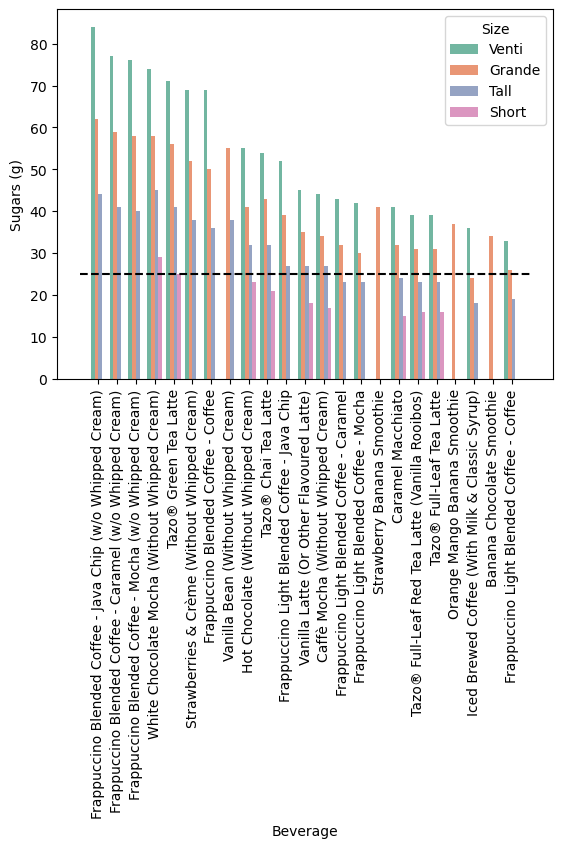

In [442]:
# Assume 'Nonfat Milk' or '' for 'Beverage_prep' for simplicity
# What about for women?
col, thresh = 'Sugars (g)', 25
high_sugar = drinks_expanded[(drinks_expanded[col] > thresh)]
bevs = list(high_sugar['Beverage'].unique())

milk = ["Nonfat Milk", ""]
beverages = drinks_expanded[(drinks_expanded['Beverage'].isin(bevs)) & (drinks_expanded['Beverage_prep'].isin(milk))].sort_values(by=col, ascending=False)
# beverages

# There are a lot of Venti's obviously, but what about smaller sizes?
# venti = list(high_sugar[high_sugar['Size']=='Venti']['Beverage'].unique())
# grande = list(high_sugar[high_sugar['Size']=='Grande']['Beverage'].unique())
# tall = list(high_sugar[high_sugar['Size']=='Tall']['Beverage'].unique())
# short = list(high_sugar[high_sugar['Size']=='Short']['Beverage'].unique())

# print("Short:", short) # Watch out for these items. Even as a short, they already go over the recommended amount
# # ['Caramel Apple Spice (Without Whipped Cream)', 'White Chocolate Mocha (Without Whipped Cream)']

# # what is in tall that is not in short?
# tall2 = [i for i in tall if i not in short]
# print("Tall:", tall2)
# # ['Caramel Apple Spice (Without Whipped Cream)', 'White Chocolate Mocha (Without Whipped Cream)', 'Java Chip (Without Whipped Cream)', 'Caramel (Without Whipped Cream)', 'Tazo® Green Tea Latte', 'Mocha (Without Whipped Cream)', 'Vanilla Bean (Without Whipped Cream)', 'Strawberries & Crème (Without Whipped Cream)']

# # what is in grande that is not in tall?
# grande2 = [i for i in grande if i not in tall]
# print("Grande:", grande2) 
# # ['Coffee', 'Tazo® Chai Tea Latte', 'Strawberry Banana Smoothie', 'Hot Chocolate (Without Whipped Cream)', 'Java Chip', 'Orange Mango Banana Smoothie'] 

# # what is in venti that is not in tall or grande?
# venti2 = [i for i in venti if i not in grande]
# print("Venti:", venti2)
# # ['Shaken Iced Tazo® Tea Lemonade (With Classic Syrup)', 'Vanilla Latte (Or Other Flavoured Latte)', 'Caffè Mocha (Without Whipped Cream)', 'Caramel', 'Mocha', 'Caramel Macchiato', 'Tazo® Full-Leaf Tea Latte', 'Tazo® Full-Leaf Red Tea Latte (Vanilla Rooibos)']

ax = sns.barplot(data=beverages, x='Beverage', y='Sugars (g)', hue='Size', palette='Set2')
plt.xticks(rotation=90)
plt.plot([-1, 23], [25, 25], "k--")
plt.show()

### Least amount of sugar?

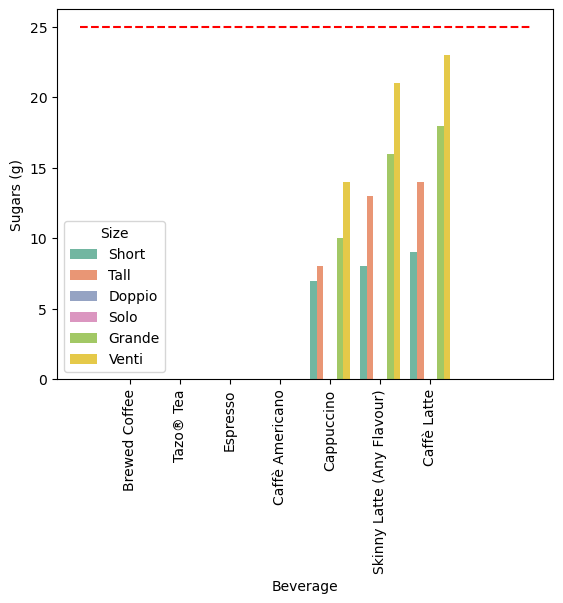

In [444]:
# Assume 'Nonfat Milk' or '' for 'Beverage_prep' for simplicity
col, thresh = 'Sugars (g)', 0.1
low_sugar = drinks_expanded[(drinks_expanded[col] <= drinks_expanded[col].quantile(thresh))].sort_values(by=col, ascending=True)
# low_sugar
bevs = list(low_sugar['Beverage'].unique())
milk = ["Nonfat Milk", "", np.nan]
beverages = drinks_expanded[(drinks_expanded['Beverage'].isin(bevs)) & (drinks_expanded['Beverage_prep'].isin(milk))].sort_values(by=col, ascending=True)
beverages

ax = sns.barplot(data=beverages, x='Beverage', y='Sugars (g)', hue='Size', palette='Set2')
plt.xticks(rotation=90)
plt.plot([-1, 8], [25, 25], "--", color='red')
plt.show()

### Actually, what is the sugar level of all drinks?

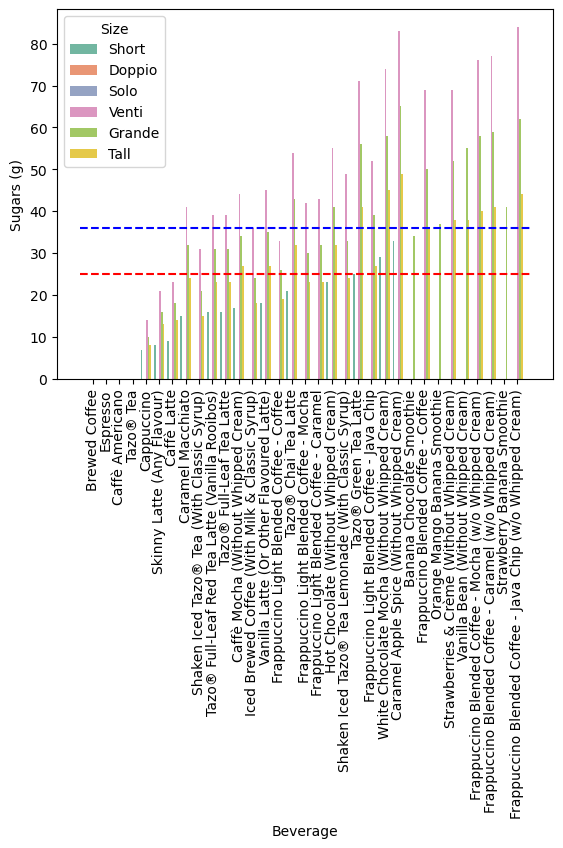

In [446]:
# Assume 'Nonfat Milk' or '' for 'Beverage_prep' for simplicity
col = 'Sugars (g)'
milk = ["Nonfat Milk", "", np.nan]
beverages = drinks_expanded[drinks_expanded['Beverage_prep'].isin(milk)].sort_values(by=col, ascending=True)
beverages

ax = sns.barplot(data=beverages, x='Beverage', y='Sugars (g)', hue='Size', palette='Set2')
plt.xticks(rotation=90)
plt.plot([-1, 33], [25, 25], "--", color='red')
plt.plot([-1, 33], [36, 36], "--", color='blue')
plt.show()

### What is the caffeine level for all drinks?

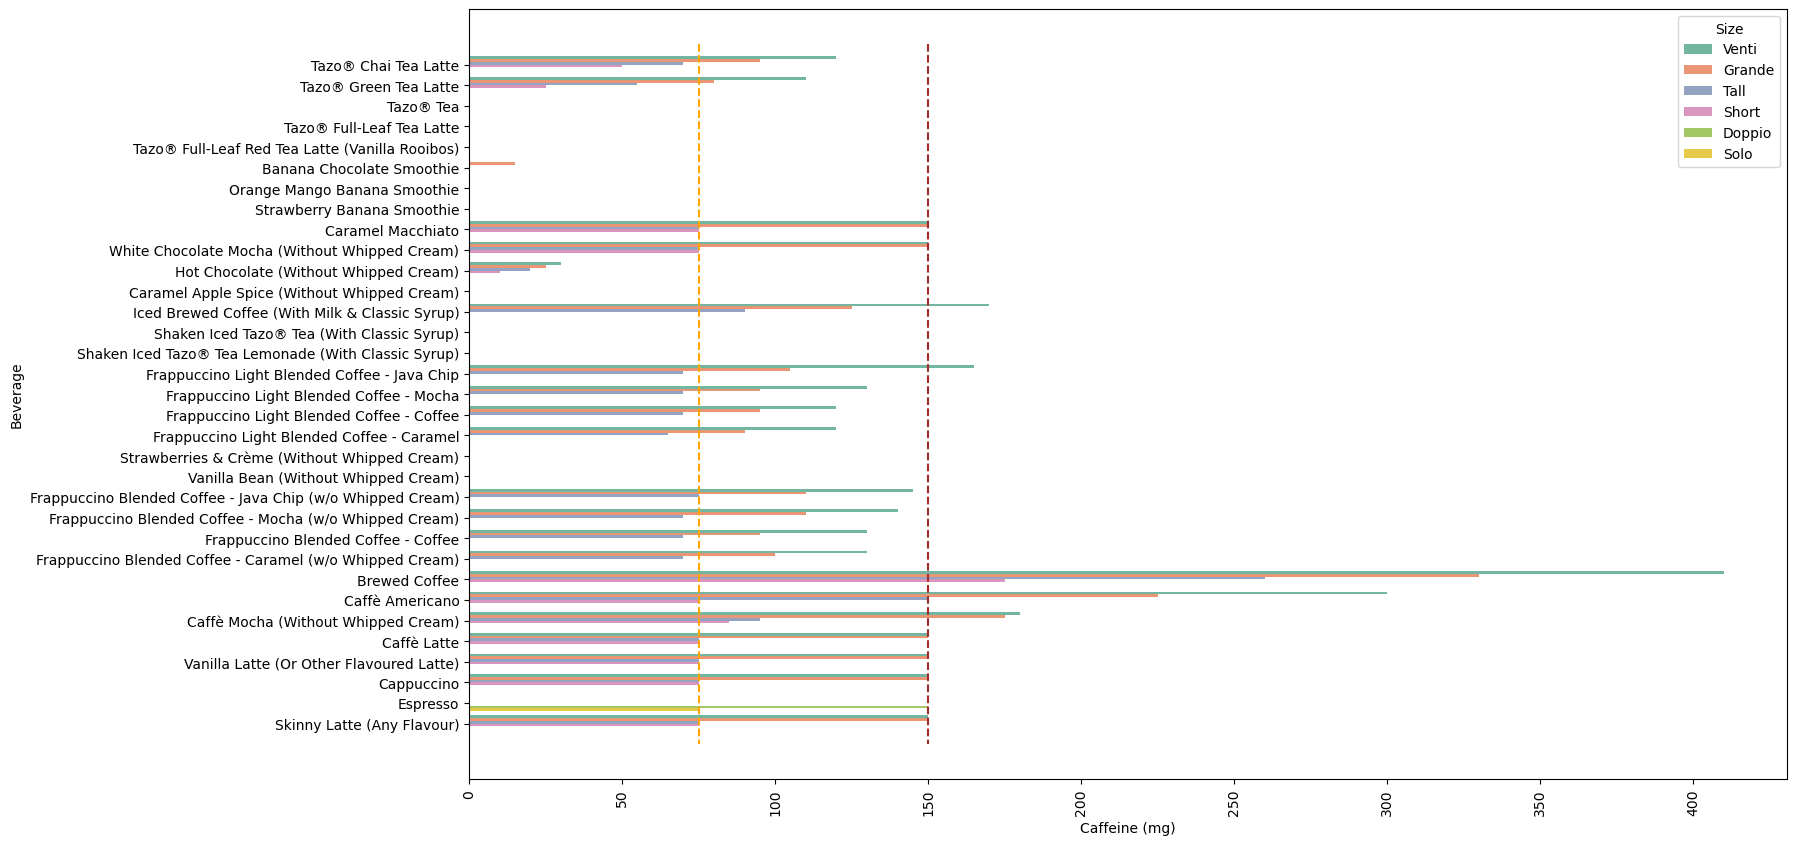

In [448]:
# Assume 'Nonfat Milk' or '' for 'Beverage_prep' for simplicity
col = 'Caffeine (mg)'
milk = ["Nonfat Milk", "", np.nan]
beverages = drinks_expanded[drinks_expanded['Beverage_prep'].isin(milk)].sort_values(by=['Beverage_category', col], ascending=[False, False])
beverages

fig, ax = plt.subplots(figsize=(17,10))
# ax = sns.barplot(data=beverages, x='Beverage', y=col, hue='Size', palette='Set2')
ax = sns.barplot(data=beverages, y='Beverage', x=col, hue='Size', palette='Set2')
plt.xticks(rotation=90)

# 75 mg of caffeine in 1 shot of espresso

plt.plot([75, 75], [-1, 33], "--", color='orange')
plt.plot([150, 150], [-1, 33], "--", color='brown')

# plt.plot([-1, 33], [75, 75], "--", color='orange')
# plt.plot([-1, 33], [150, 150], "--", color='brown')
plt.show()

### What kind of drinks are available?

In [450]:
categories = list(drinks_expanded['Beverage_category'].unique())
for i in categories:
    drinks = drinks_expanded[drinks_expanded['Beverage_category']==i]['Beverage'].unique()
    print(i)
    print(drinks)

Coffee
['Brewed Coffee']
Classic Espresso Drinks
['Caffè Latte' 'Caffè Mocha (Without Whipped Cream)'
 'Vanilla Latte (Or Other Flavoured Latte)' 'Caffè Americano' 'Cappuccino'
 'Espresso' 'Skinny Latte (Any Flavour)']
Signature Espresso Drinks
['Caramel Macchiato' 'White Chocolate Mocha (Without Whipped Cream)'
 'Hot Chocolate (Without Whipped Cream)'
 'Caramel Apple Spice (Without Whipped Cream)']
Tazo® Tea Drinks
['Tazo® Tea' 'Tazo® Chai Tea Latte' 'Tazo® Green Tea Latte'
 'Tazo® Full-Leaf Tea Latte'
 'Tazo® Full-Leaf Red Tea Latte (Vanilla Rooibos)']
Shaken Iced Beverages
['Iced Brewed Coffee (With Classic Syrup)'
 'Iced Brewed Coffee (With Milk & Classic Syrup)'
 'Shaken Iced Tazo® Tea (With Classic Syrup)'
 'Shaken Iced Tazo® Tea Lemonade (With Classic Syrup)']
Smoothies
['Banana Chocolate Smoothie' 'Orange Mango Banana Smoothie'
 'Strawberry Banana Smoothie']
Frappuccino® Blended Coffee
['Frappuccino Blended Coffee - Coffee'
 'Frappuccino Blended Coffee - Mocha (w/o Whipped Crea